In [2]:
from IPython.display import display, HTML

display(HTML('''
<h1 style="text-align:center; font-family:Arial, sans-serif; margin-top:30px;">
  Data-Driven Modeling of Medical Insurance
</h1>
             
             
<h3 style="text-align:center; font-family:Arial, sans-serif; color:gray;">
  Using Statistical and Machine Learning Methods
</h3>
<hr style="width:60%; margin:20px auto; border:1px solid #ccc;">
'''))


In [3]:
from IPython.display import display, HTML

display(HTML('''
<h1 style=" color: red; font-size: 32px; font-weight: bold;">
     1. Introduction
</h1>

<h2><strong> Goal:</strong></h2>
<p>This notebook develops <b>three data-driven models</b> on a medical insurance dataset to support decision-making.</br>
The focus is on predicting costs, segmenting clients, and assessing risk to personalize reimbursement strategies.</p>

<h2 style="color: bleu;" >  Key Steps:</h2>
<ul>
    <li><strong>Data Understanding</strong></li>
    <li> <strong>Exploratory Data Analysis (EDA)</strong></li>
    <li> <strong>Data Preparation</strong></li>
    <li> <strong>Modeling (Regression, Clustering, Risk Scoring)</strong></li>
    <li> <strong>Evaluation & Interpretation</strong></li>
    <li> <strong>Conclusion & Perspectives</strong></li>
</ul>

<h2 style="color: bleu"  > Models Implemented:</h2>
<ul>
    <li><b>BO1:</b> Regression (predicting insurance charges)</li>
    <li> <b>BO2:</b> Clustering (segmenting clients for targeted programs)</li>
    <li> <b>BO3:</b> Risk Scoring (personalized reimbursement %)</li>
</ul>

<h2 style="color: bleu; " > Dataset:</h2>
<ul>
    <li> <code>dataAssuranceU.csv</code></li>
</ul>

<h2 style="color: bleu; " >Evaluation Metrics:</h2>
<ul>
    <li>MAE / RMSE / R² (Regression)</li>
    <li>Silhouette Score (Clustering)</li>
    <li>Accuracy / Precision / Recall / F1 / ROC-AUC (Risk Scoring)</li>
</ul>
'''))


In [4]:
from IPython.display import display, HTML

display(HTML('''
<h2 style="color:red;">2. Data Loading and Understanding</h2>
<p style="font-family:Arial, sans-serif; font-size:14px;">
We load the dataset (<code>dataAssuranceU.xlsx</code>) and review its structure, types, and descriptive statistics.
</p>
'''))

import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer

data = pd.read_csv('dataAssuranceU.csv')
print("Dataset shape:", data.shape)
data.head()


Dataset shape: (2781, 7)


,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


In [5]:
from IPython.display import display, HTML

display(HTML('''
<h2 style="font-family:Arial, sans-serif; font-size:14px;">
Dataset Info :</h2>
'''))
data.info()
display(HTML('''
<h2 style="font-family:Arial, sans-serif; font-size:14px;">
Dataset Description :</h2>
'''))
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2781 entries, 0 to 2780
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2744 non-null   float64
 1   sex       2743 non-null   object 
 2   bmi       2748 non-null   float64
 3   children  2752 non-null   float64
 4   smoker    2755 non-null   object 
 5   region    2748 non-null   object 
 6   charges   2752 non-null   float64
dtypes: float64(4), object(3)
memory usage: 152.2+ KB


,age,bmi,children,charges
count,2744.000000,2748.000000,2752.000000,2752.000000
mean,39.192784,30.651212,1.090480,13223.606662
std,14.056200,6.104509,1.200459,12045.048983
min,18.000000,15.960000,0.000000,1121.870000
25%,26.000000,26.220000,0.000000,4746.343000
50%,39.000000,30.332500,1.000000,9377.902350
75%,51.000000,34.700000,2.000000,16579.959427
max,64.000000,53.130000,5.000000,63770.430000


In [6]:
from IPython.display import display, HTML

# Display title for null values
display(HTML('''
<h2 style="font-family:Arial, sans-serif; font-size:14px;">
The null values ​​of each column :</h2>
'''))

# Show the count of null values for each column
display(data.isnull().sum())

# Display title for duplicated values
display(HTML('''
<h2 style="font-family:Arial, sans-serif; font-size:14px;">
The duplicated rows ​​of each column :</h2>
'''))

# Show the count of duplicated rows
display(data.duplicated().sum())
display(data[data.duplicated()])

age         37
sex         38
bmi         33
children    29
smoker      26
region      33
charges     29
dtype: int64

np.int64(151)

,age,sex,bmi,children,smoker,region,charges
1338,41.0,male,30.59,2.0,no,northwest,7256.7231
1339,51.0,male,32.30,1.0,no,northeast,9964.0600
1340,53.0,female,33.25,0.0,no,northeast,10564.8845
1341,29.0,male,31.73,2.0,no,northwest,4433.3877
1342,30.0,male,31.40,1.0,no,southwest,3659.3460
...,...,...,...,...,...,...,...
2709,55.0,female,30.50,0.0,no,southwest,10704.4700
2712,45.0,male,27.50,3.0,no,southwest,8615.3000
2718,57.0,male,23.70,0.0,no,southwest,10959.3300
2727,61.0,male,36.30,1.0,yes,southwest,47403.8800


In [7]:
for col in data.select_dtypes(include=["object"]).columns:
    print(f"{col}: {data[col].nunique()} catégories")
    print(data[col].value_counts(), "\n")


sex: 2 catégories
sex
male      1395
female    1348
Name: count, dtype: int64 

smoker: 2 catégories
smoker
no     2196
yes     559
Name: count, dtype: int64 

region: 4 catégories
region
southeast    745
northwest    670
southwest    669
northeast    664
Name: count, dtype: int64 



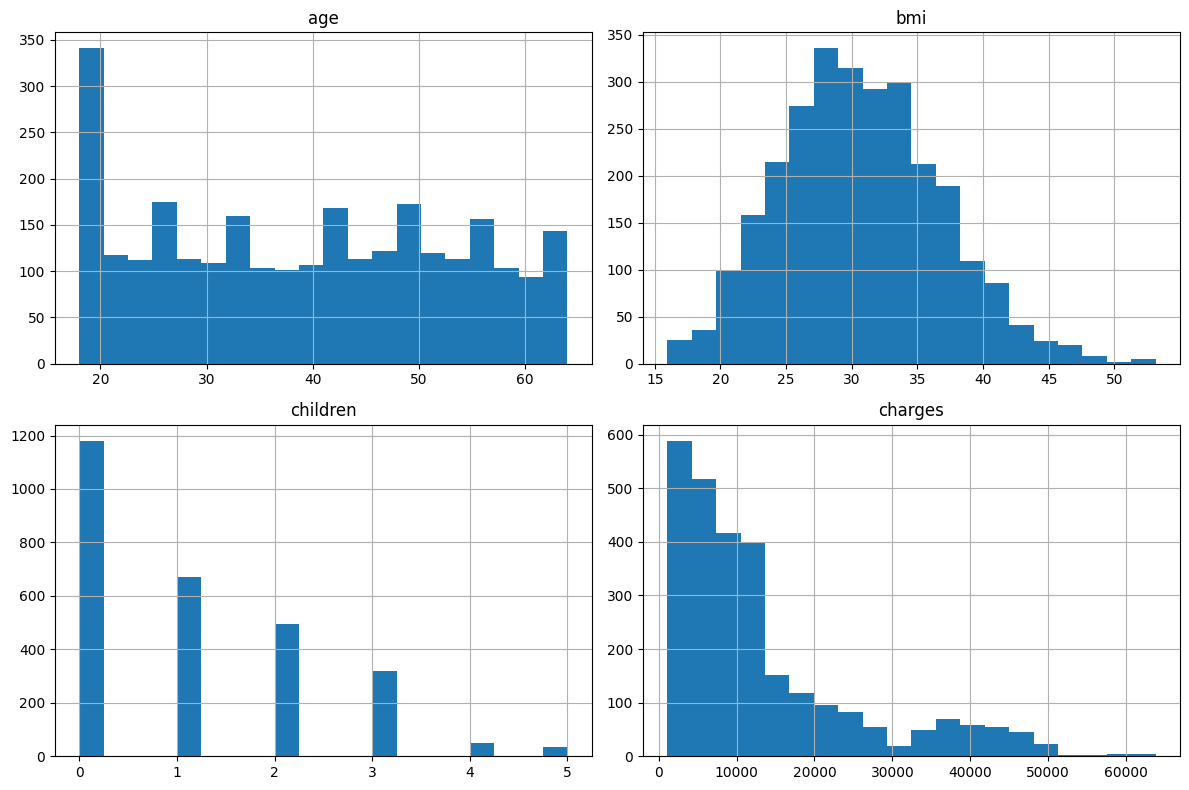

In [8]:
data.hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()


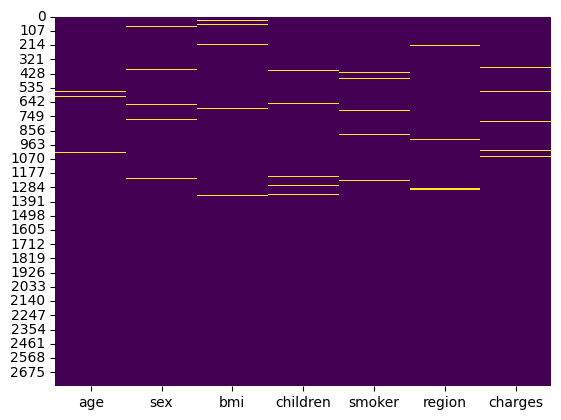

In [9]:
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.show()

In [10]:
from IPython.display import display, HTML

display(HTML('''
<h2 style="color: #77DD77; font-weight: bold;">General Conclusion</h2>
<p>Based on the data understanding phase, we can highlight the following key insights:</p>
<ul>
    <li>The dataset contains a total of <strong>1,338 entries</strong> and <strong>7 columns</strong>, combining both categorical and numerical variables such as <em>age</em>, <em>sex</em>, <em>bmi</em>, <em>children</em>, <em>smoker</em>, <em>region</em>, and <em>charges</em>.</li>
    <li>Several <strong>missing values</strong> were detected across different columns. These need to be handled carefully using strategies such as imputation or row removal to maintain data quality.</li>
    <li>A total of <strong>151 duplicate rows</strong> were identified, which should be removed to ensure the accuracy and integrity of the analysis.</li>
    <li>Numerical variables like <em>bmi</em>, <em>age</em>, and <em>charges</em> may contain outliers that require further examination to avoid bias in the model.</li>
    <li>After addressing missing data, removing duplicates, and dealing with outliers, the dataset will be ready for feature encoding, scaling, and predictive modeling.</li>
</ul>
<p>These findings indicate that while the dataset has potential for analysis, proper data cleaning is essential to ensure reliable and accurate modeling results.</p>
'''))

In [11]:
from IPython.display import display, HTML

display(HTML('''
<h2 style="color: red; font-size: 32px; font-weight: bold;">
     3. Data Exploration
</h2>

<p>In this section, we dive deeper into the <code>dataAssuranceU.csv</code> dataset to explore its 
numerical and categorical features, identify any outliers, and visualize distributions to better 
understand the drivers of <b>insurance charges</b>.</p>

<h2 style="color: white;"  >Objectives:</h2>
<ul>
    <li> <strong>Visualize numerical features</strong> (e.g., age, BMI, charges) to analyze distributions and patterns.</li>
    <li> <strong>Examine categorical variables</strong> (e.g., sex, smoker, region) and their influence on charges.</li>
    <li>  <strong>Detect outliers</strong> that could distort regression or clustering results.</li>
    <li> <strong>Analyze correlations</strong> between features and charges to identify key predictors.</li>
</ul>

<h2 style="color: white;"  >Steps:</h2>
<ul>
    <li> Use histograms and boxplots to explore distributions of numerical features.</li>
    <li> Create bar plots to summarize categorical variables.</li>
    <li> Identify and visualize potential outliers in features such as BMI and charges.</li>
    <li> Compute and visualize correlation matrices to highlight relationships between variables.</li>
</ul>

<h2 style="color: white;"  >Expected Outputs:</h2>
<ul>
    <li>Distribution plots of numerical features (histograms, boxplots).</li>
    <li> Summary analysis of categorical variables (bar plots, counts).</li>
    <li> Clear identification of outliers that may need treatment.</li>
    <li> Correlation heatmap showing relationships with charges.</li>
</ul>
'''))


Numerical columns: ['age', 'bmi', 'children', 'charges']


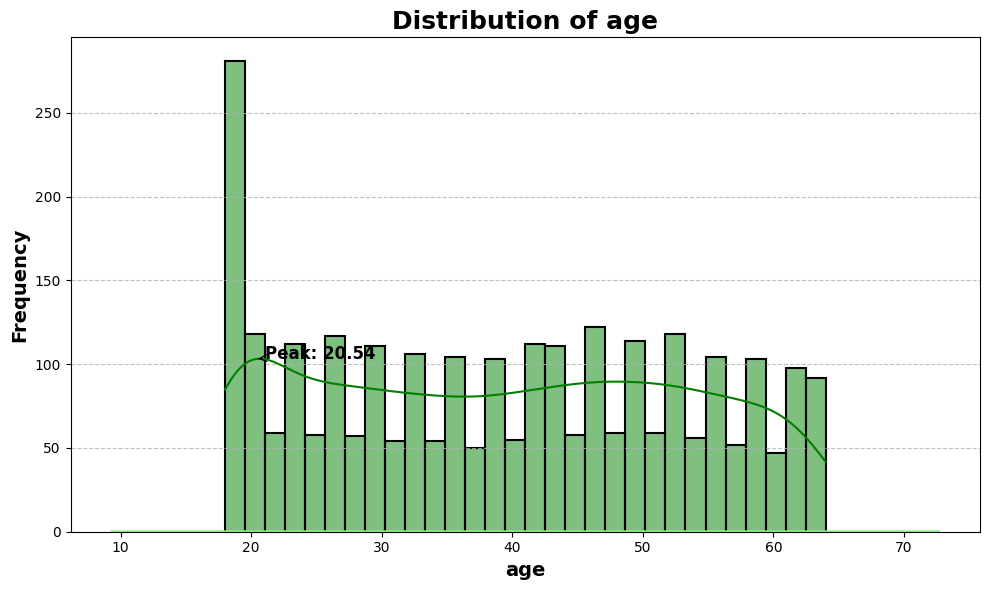

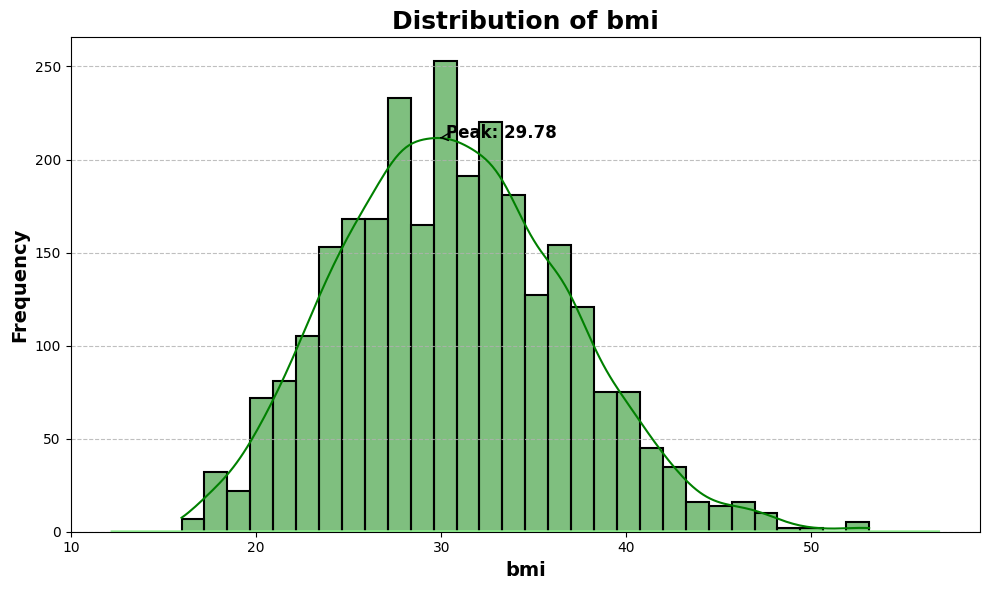

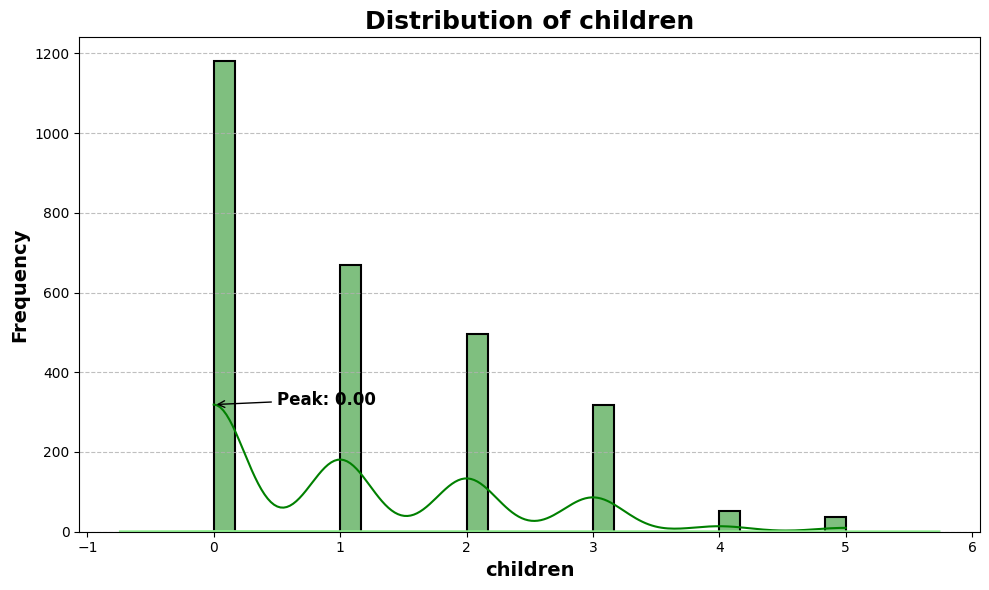

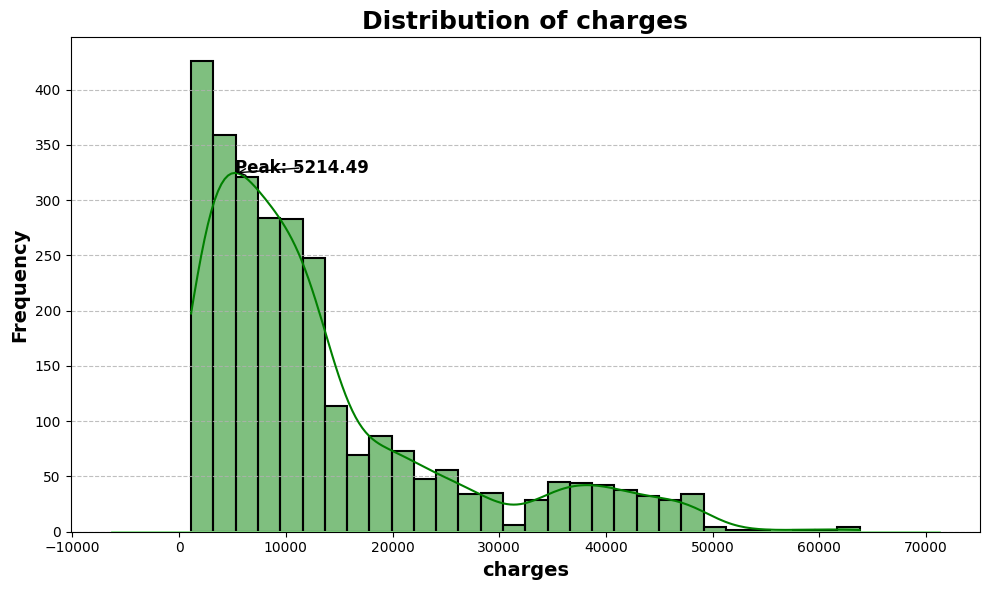

In [12]:
# Identify only numerical columns
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
print("Numerical columns:", numerical_cols)

# Loop through each numerical column
for col in numerical_cols:
    plt.figure(figsize=(10, 6))

    # Histogram + KDE
    sns.histplot(data[col].dropna(), kde=True, color="green",
                 edgecolor="black", linewidth=1.5, bins=30)

    # Titles and labels
    plt.title(f'Distribution of {col}', fontsize=18, fontweight='bold', color='black')
    plt.xlabel(col, fontsize=14, fontweight='bold', color='black')
    plt.ylabel('Frequency', fontsize=14, fontweight='bold', color='black')

    # Grid customization
    plt.grid(axis='y', linestyle='--', linewidth=0.8, alpha=0.8)

    # Find and annotate peak of KDE
    if data[col].notnull().any():
        kde_ax = sns.kdeplot(data[col].dropna(), color="lightgreen", linewidth=2)
        y_data = kde_ax.lines[0].get_data()[1]
        x_data = kde_ax.lines[0].get_data()[0]
        max_density = y_data.max()
        max_x = x_data[y_data.argmax()]

        plt.annotate(f"Peak: {max_x:.2f}",
                     xy=(max_x, max_density),
                     xytext=(max_x + 0.5, max_density + 0.02),
                     arrowprops=dict(facecolor='black', arrowstyle='->'),
                     fontsize=12, color="black", fontweight="bold")

    # Adjust layout
    plt.tight_layout()
    plt.show()


Categorical columns: ['sex', 'smoker', 'region']


C:\Users\yassi\AppData\Local\Temp\ipykernel_25532\3836058793.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=s, order=order, palette="pastel")
C:\Users\yassi\AppData\Local\Temp\ipykernel_25532\3836058793.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=s, order=order, palette="pastel")
C:\Users\yassi\AppData\Local\Temp\ipykernel_25532\3836058793.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=s, order=order, palette="pastel")


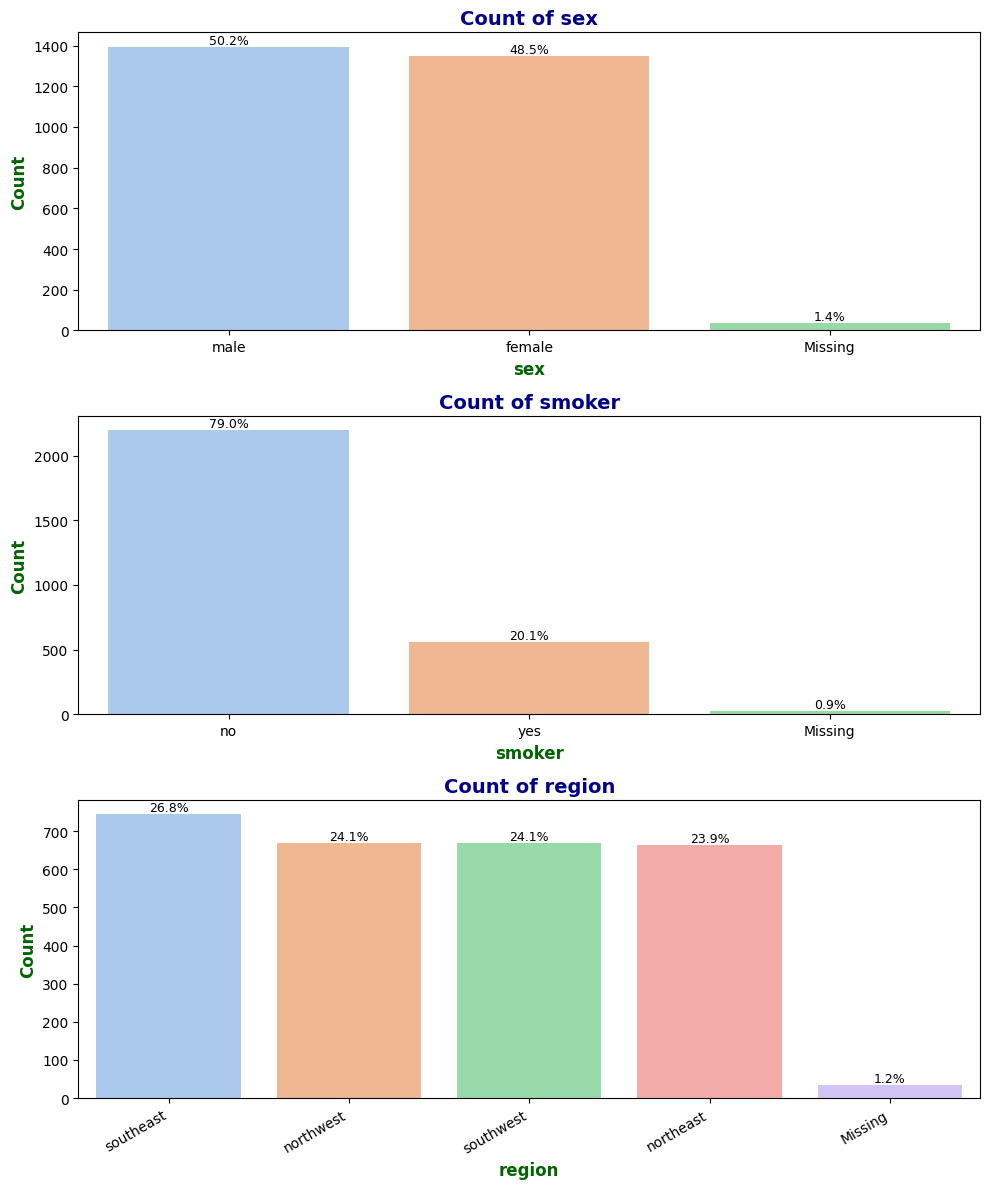

In [13]:
# 3) Pick categorical columns
categorical_cols = data.select_dtypes(include=['object','category','bool']).columns.tolist()
print("Categorical columns:", categorical_cols)
# 4) Count plots for each categorical column (one per row)
if len(categorical_cols) == 0:
    display(HTML("<b>No categorical columns found.</b>"))
else:
    n = len(categorical_cols)
    plt.figure(figsize=(10, 4*n))
    for i, col in enumerate(categorical_cols, 1):
        plt.subplot(n, 1, i)
        # order by frequency, include NaN as 'Missing'
        s = data[col].astype("object").fillna("Missing")
        order = s.value_counts().index
        ax = sns.countplot(x=s, order=order, palette="pastel")
        plt.title(f"Count of {col}", fontsize=14, fontweight="bold", color="darkblue")
        plt.xlabel(col, fontsize=12, fontweight="bold", color="darkgreen")
        plt.ylabel("Count", fontsize=12, fontweight="bold", color="darkgreen")
        # rotate labels if many categories
        if len(order) > 4:
            plt.xticks(rotation=30, ha="right")
        # annotate bars with percentages
        total = len(s)
        for p in ax.patches:
            h = p.get_height()
            if h > 0:
                ax.annotate(f"{h/total:,.1%}", (p.get_x()+p.get_width()/2, h),
                            ha="center", va="bottom", fontsize=9)
    plt.tight_layout()
    plt.show()


Numeric columns: ['age', 'bmi', 'children', 'charges']


,age,bmi,children,charges
age,1.000000,0.110958,0.038353,0.300528
bmi,0.110958,1.000000,0.006917,0.199456
children,0.038353,0.006917,1.000000,0.059249
charges,0.300528,0.199456,0.059249,1.000000


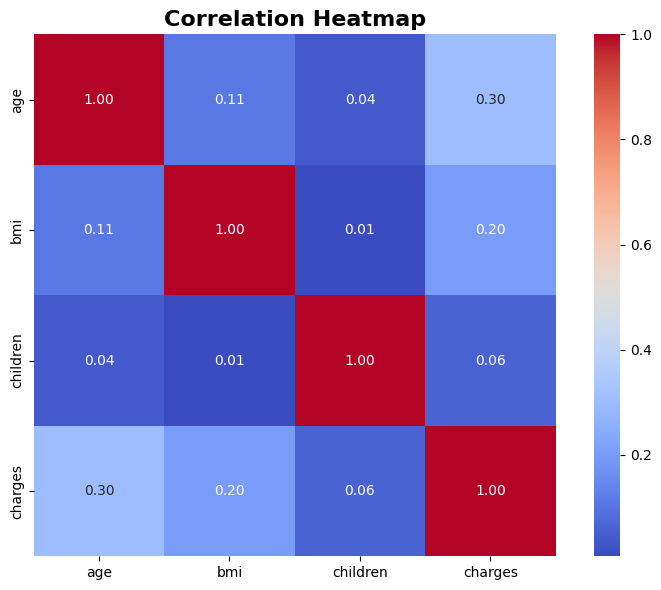

In [14]:
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Numeric columns:", numeric_cols)
# Compute correlation
corr_matrix = data[numeric_cols].corr()

# Display as a table
display(HTML('<h3 style="color:#00A2FF;">Correlation Matrix</h3>'))
display(corr_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


In [15]:
from IPython.display import display, HTML

display(HTML('''
<h2 style="color:#77DD77; font-weight:bold;">Correlation Analysis Summary</h2>
<p>Based on the correlation matrix and heatmap, here are the main insights:</p>
<ul>
    <li> <strong>Age</strong> shows the highest correlation with <strong>charges</strong> (<b>0.30</b>), indicating that older individuals tend to incur higher medical costs.</li>
    <li> <strong>BMI</strong> has a weak positive correlation with charges (<b>0.20</b>), suggesting that higher BMI may slightly increase charges.</li>
    <li> <strong>Children</strong> has almost no correlation with charges (<b>0.06</b>), meaning family size has minimal direct impact on costs.</li>
    <li> The correlations between the independent variables (<em>age, bmi, children</em>) are very low, indicating no multicollinearity issues.</li>
</ul>
<p><strong>Conclusion:</strong> Age and BMI are the most relevant predictors for charges, while children has limited influence.</p>
'''))


,charges
charges,1.000000
smoker_yes,0.774582
age,0.300528
bmi,0.199456
age_group_55+,0.198868
bmi_cat_Obesity,0.195468
region_southeast,0.079252
children_cat_2,0.063538
children,0.059249
age_group_30-55,0.056294


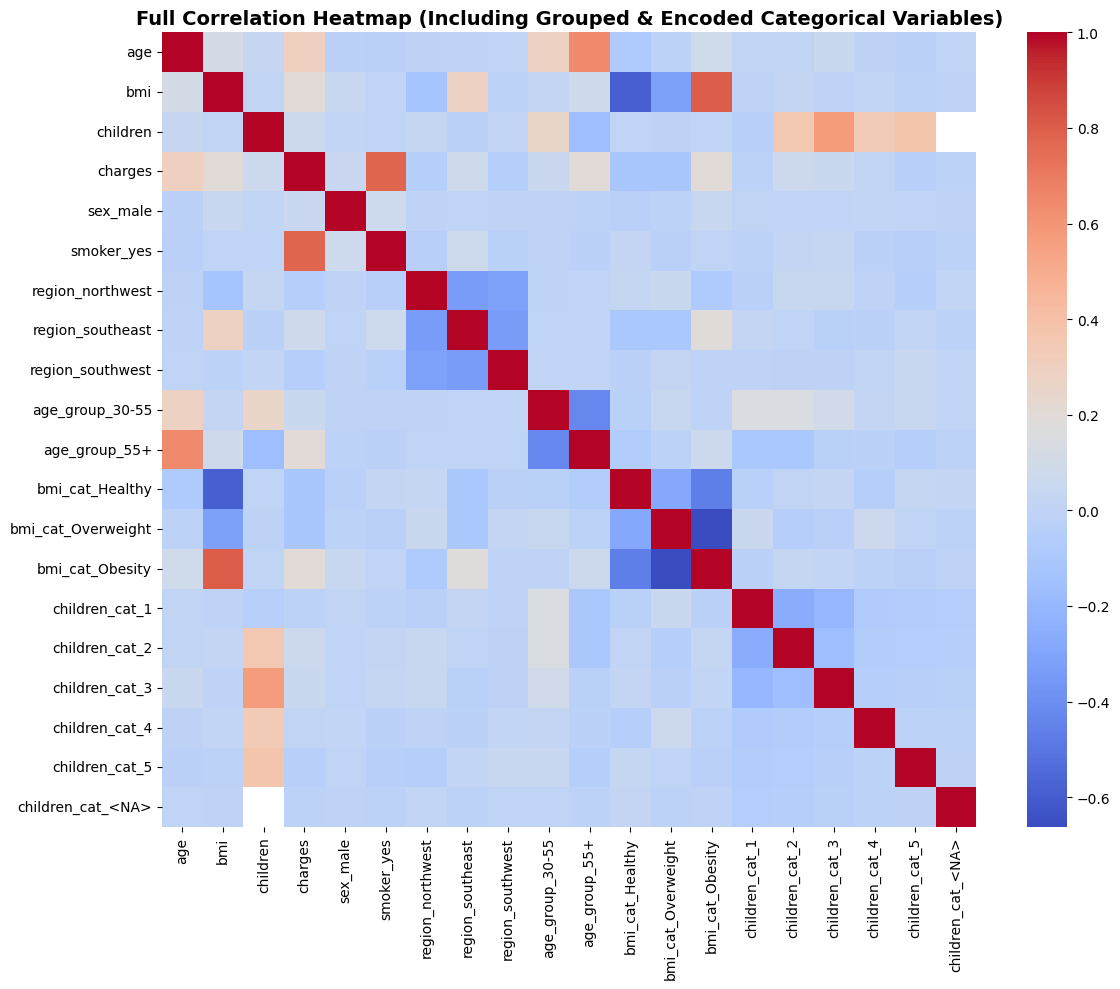

In [16]:
# ---- Custom Grouping Before Encoding ----
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Create a copy of the original dataset
df = data.copy()

# Age groups
df['age_group'] = pd.cut(
    df['age'],
    bins=[18, 30, 55, np.inf],
    labels=['18-30', '30-55', '55+'],
    include_lowest=True
)

# BMI categories
df['bmi_cat'] = pd.cut(
    df['bmi'],
    bins=[-np.inf, 18.5, 24.9, 29.9, np.inf],
    labels=['Underweight', 'Healthy', 'Overweight', 'Obesity']
)

# Children categories (cap at 5)
df['children_cat'] = df['children'].clip(0, 5).astype('Int64').astype(str)

# ---- Dummy Encoding for ALL categorical variables ----
categorical_columns = ['sex', 'smoker', 'region', 'age_group', 'bmi_cat', 'children_cat']
data_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# ---- Correlation Matrix ----
corr_matrix_full = data_encoded.corr(numeric_only=True)

# Display sorted correlation of all variables with 'charges'
display(HTML('<h3 style="color:#00A2FF;">Correlation with Charges</h3>'))
display(corr_matrix_full['charges'].sort_values(ascending=False).to_frame())

# ---- Heatmap ----
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_full, cmap="coolwarm", annot=False, cbar=True)
plt.title("Full Correlation Heatmap (Including Grouped & Encoded Categorical Variables)",
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


In [17]:
from IPython.display import display, HTML

display(HTML('''
<h2 style="color:#77DD77; font-weight:bold;"> Correlation Heatmap Summary</h2>
<p>The heatmap below shows the relationships between numerical and encoded categorical variables after grouping them into meaningful categories.</p>

<ul>
    <li><strong>Smoker (yes)</strong> has the <span style="color:red;"><b>strongest positive correlation</b></span> with charges. 
    This indicates that smokers tend to have significantly higher medical costs than non-smokers.</li>

    <li><strong>Age Groups</strong>:
        <ul>
            <li>Individuals in the <b>55+</b> group show a noticeable positive correlation with charges.</li>
            <li>The <b>30-55</b> group has a moderate correlation, while <b>18-30</b> is the lowest.</li>
        </ul>
    </li>

    <li><strong>BMI Categories</strong>:
        <ul>
            <li><b>Obesity</b> category correlates positively with higher charges.</li>
            <li>Healthy and Underweight groups show lower or negative correlations.</li>
        </ul>
    </li>

    <li> <strong>Children (0-5)</strong>:
        <ul>
            <li>Very weak correlations with charges, indicating family size has minimal impact on medical costs.</li>
        </ul>
    </li>

    <li> <strong>Region</strong>:
        <ul>
            <li>Only minor differences are observed between regions (northwest, northeast, southwest, southeast).</li>
            <li>These variations are too small to be significant predictors of charges.</li>
        </ul>
    </li>

    <li> <strong>Sex</strong>:
        <ul>
            <li>Almost no correlation between gender and charges, meaning male and female have similar average costs.</li>
        </ul>
    </li>
</ul>

<p><strong>Conclusion:</strong> The most important drivers of charges are <b>smoking status</b>, followed by <b>age group</b> and <b>BMI category</b>. 
Region, sex, and number of children have limited or no direct influence.</p>
'''))


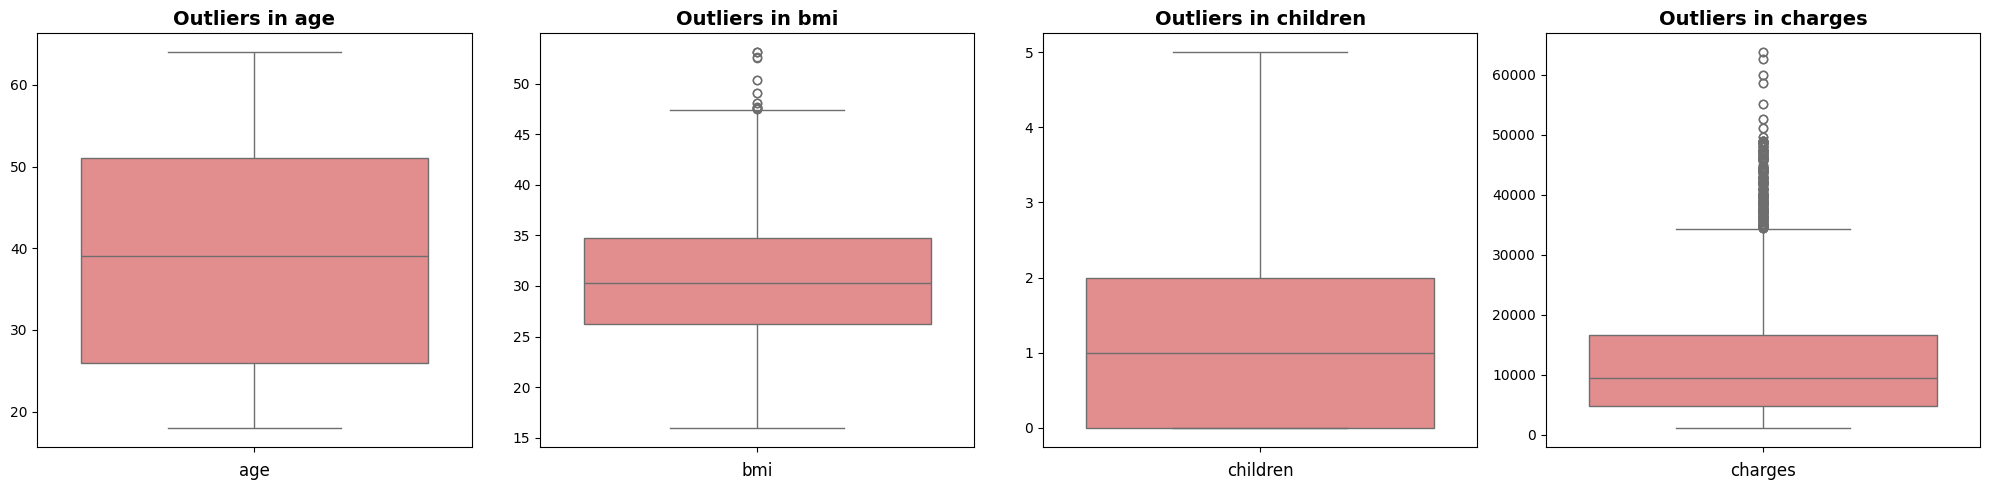

In [18]:
import math

# Select only numerical columns
num_features = data.select_dtypes(include=['float64', 'int64']).columns

# Number of columns in the grid
cols = 4

# Calculate how many rows are needed
rows = math.ceil(len(num_features) / cols)

# Set figure size based on number of columns and rows
plt.figure(figsize=(cols * 5, rows * 5))

# Create a boxplot for each numeric column
for i, feature in enumerate(num_features, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(y=data[feature], color='lightcoral')
    plt.title(f'Outliers in {feature}', fontsize=14, fontweight='bold')
    plt.ylabel('')
    plt.xlabel(feature, fontsize=12)

# Adjust layout to avoid overlaps
plt.tight_layout()
plt.show()

C:\Users\yassi\AppData\Local\Temp\ipykernel_25532\2866001301.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[f"PC{i+1}" for i in range(len(evr))], y=evr, palette="coolwarm")


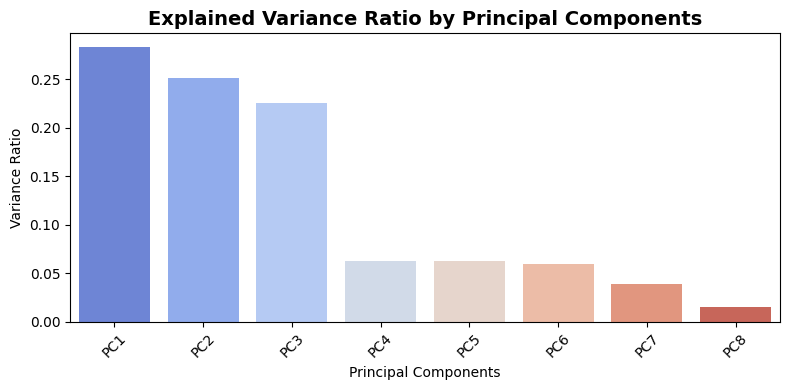

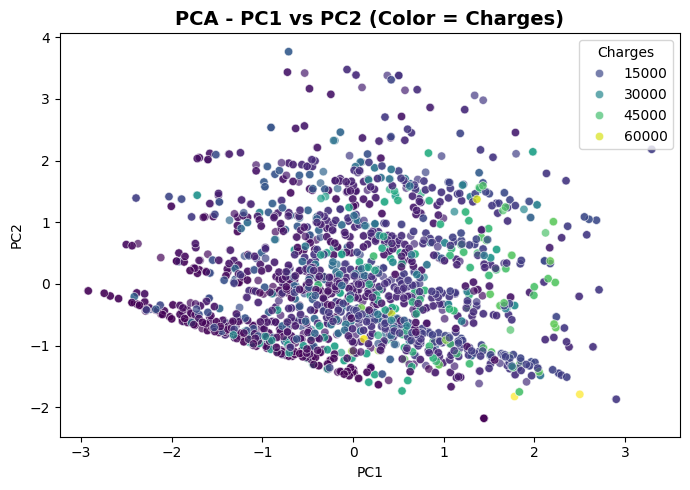

Final PCA output shape: (2781, 8)
Any NaNs left after preprocessing? False


In [19]:
# --- PCA Workflow with Missing Value Handling in One Block ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# 1) Copy dataset
df = data.copy()

# 2) Identify numeric and categorical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()

# Ensure 'charges' is treated as target and excluded from features
target = "charges"
if target in num_cols:
    num_cols.remove(target)

# 3) Preprocessing pipelines
num_pipe = Pipeline([
    ("impute", SimpleImputer(strategy="median")),        # Replace NaN with median
    ("scale", StandardScaler())                          # Standardize
])

cat_pipe = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")), # Replace NaN with most frequent
    ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore")) # Encode categorical
])

pre = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols)
], remainder="drop")

# 4) Prepare X and y
X = df.drop(columns=[target]) if target in df.columns else df
y = df[target] if target in df.columns else None

# 5) PCA Pipeline
pca = PCA()  # or PCA(n_components=0.9) to keep 90% variance
pipe = Pipeline([
    ("pre", pre),
    ("pca", pca)
])

# 6) Fit-transform PCA
Z = pipe.fit_transform(X)

# 7) Explained Variance Plot
evr = pipe.named_steps["pca"].explained_variance_ratio_
plt.figure(figsize=(8,4))
sns.barplot(x=[f"PC{i+1}" for i in range(len(evr))], y=evr, palette="coolwarm")
plt.title("Explained Variance Ratio by Principal Components", fontsize=14, fontweight='bold')
plt.xlabel("Principal Components")
plt.ylabel("Variance Ratio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 8) Scatter Plot of First Two Principal Components
pc1, pc2 = Z[:,0], Z[:,1]
plt.figure(figsize=(7,5))
sns.scatterplot(x=pc1, y=pc2, hue=y, palette="viridis", alpha=0.7)
plt.title("PCA - PC1 vs PC2 (Color = Charges)", fontsize=14, fontweight='bold')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title='Charges', loc='upper right')
plt.tight_layout()
plt.show()

# 9) Quick checks to ensure no missing values remain
print("Final PCA output shape:", Z.shape)
print("Any NaNs left after preprocessing?", np.isnan(Z).any())


In [20]:
from IPython.display import display, HTML

display(HTML("""
<h2 style="color:#77DD77;font-weight:bold;"> PCA  Résumé d’interprétation : </h2>
<ul>
  <li> <b>Variance expliquée</b> :
    <ul>
      <li><b>PC1 ≈ 28%</b>, <b>PC2 ≈ 25%</b>, <b>PC3 ≈ 23%</b> &rarr; les trois premières composantes capturent ~<b>76%</b> de la variance totale.</li>
      <li>Les composantes suivantes (PC4–PC8) apportent chacune &lt; 7% et sont d’importance secondaire.</li>
    </ul>
  </li>
  <li> <b>Projection PC1–PC2</b> :
    <ul>
      <li>Les points sont largement étalés, signe de <b>variabilité réelle</b> dans les données.</li>
      <li>La <b>coloration par charges</b> montre que les <b>charges élevées</b> se situent plutôt vers des zones spécifiques du plan (valeurs positives de PC1/PC2), indiquant que les facteurs combinés (ex. <i>smoker</i>, <i>âge</i>, <i>BMI</i>) contribuent ensemble aux coûts.</li>
      <li>Pas de séparation nette par une seule variable : l’information utile est <b>multifactorielle</b>.</li>
    </ul>
  </li>
  <li> <b>Implications</b> :
    <ul>
      <li>Pour la réduction de dimension, conserver <b>PC1–PC3</b> suffit généralement pour la visualisation et comme entrée compacte à certains modèles.</li>
      <li>Les composantes principales confirment que les variables liées au <b>risque santé</b> (tabagisme, âge, BMI) expliquent l’essentiel de la structure, tandis que d’autres (région, enfants, sexe) pèsent peu.</li>
    </ul>
  </li>
</ul>
<p><b>Conclusion :</b> Trois composantes capturent l’essentiel de l’information. Les charges élevées émergent d’une combinaison de facteurs plutôt que d’un seul indicateur isolé.</p>
"""))


In [21]:
from IPython.display import display, HTML

display(HTML('''
<h2 style="color: red; font-size: 32px; font-weight: bold;">
     3. Data Preparation
</h2>
             '''))

In [22]:
# ===============================
# 3. Data Preparation – Outliers (IQR) + NAs
# ===============================
from IPython.display import display, HTML
import numpy as np
import pandas as pd

display(HTML('''
<h2 style="color:#ff6b6b; font-weight:bold;">3. Data Preparation – Outliers (IQR) + NAs</h2>
<p>Détection des outliers par IQR, capping (winsorization) et imputation des valeurs manquantes.</p>
'''))
data = pd.read_csv('dataAssuranceU.csv')

# Copie de travail
df_prep = data.copy()

# 1) Colonnes numériques
numerical_cols = df_prep.select_dtypes(include=['int64','float64']).columns

print("Colonnes numériques:", list(numerical_cols), "\n")

# 2) Détection des outliers par colonne + comptage
print("=== Comptage des outliers (méthode IQR) ===")
iqr_bounds = {}  # pour mémoriser les bornes par variable
for col in numerical_cols:
    Q1 = df_prep[col].quantile(0.25)
    Q3 = df_prep[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    iqr_bounds[col] = (lower, upper)

    mask_out = (df_prep[col] < lower) | (df_prep[col] > upper)
    print(f"{col}: {mask_out.sum()} outliers | bornes [{lower:.3f}, {upper:.3f}]")

print("\n=== Capping (winsorization) sur bornes IQR ===")
capped_counts = {}
for col in numerical_cols:
    lower, upper = iqr_bounds[col]
    before = df_prep[col].copy()
    df_prep[col] = df_prep[col].clip(lower=lower, upper=upper)
    capped_counts[col] = (before != df_prep[col]).sum()
    print(f"{col}: valeurs cappées = {capped_counts[col]}")

# 3) Optionnel: log-transform pour variable très asymétrique (ex: 'charges'), si présente et >0
if 'charges' in df_prep.columns and (df_prep['charges'] > 0).all():
    df_prep['charges_log'] = np.log(df_prep['charges'])
    print("\nLog-transform appliqué à 'charges' -> nouvelle colonne 'charges_log'.")

# 4) Imputation simple des NAs
print("\n=== Imputation des valeurs manquantes ===")
na_before = df_prep.isna().sum()
# numériques: moyenne
for col in numerical_cols:
    if df_prep[col].isna().any():
        df_prep[col] = df_prep[col].fillna(df_prep[col].mean())
# catégorielles: mode
categorical_cols = df_prep.select_dtypes(include=['object','category']).columns
for col in categorical_cols:
    if df_prep[col].isna().any():
        df_prep[col] = df_prep[col].fillna(df_prep[col].mode().iloc[0])

na_after = df_prep.isna().sum()
print("NAs avant:\n", na_before[na_before>0])
print("\nNAs après:\n", na_after[na_after>0] if (na_after>0).any() else "Aucun NA restant")

display(HTML('''
<p style="color:#2d6a4f;"><b>Statut:</b> Outliers détectés et traités, NAs imputés. 
Le DataFrame <code>df_prep</code> est prêt pour l’encodage et le scaling.</p>
'''))


Colonnes numériques: ['age', 'bmi', 'children', 'charges'] 

=== Comptage des outliers (méthode IQR) ===
age: 0 outliers | bornes [-11.500, 88.500]
bmi: 17 outliers | bornes [13.500, 47.420]
children: 0 outliers | bornes [-3.000, 5.000]
charges: 284 outliers | bornes [-13004.082, 34330.384]

=== Capping (winsorization) sur bornes IQR ===
age: valeurs cappées = 37
bmi: valeurs cappées = 50
children: valeurs cappées = 29
charges: valeurs cappées = 313

=== Imputation des valeurs manquantes ===
NAs avant:
 age         37
sex         38
bmi         33
children    29
smoker      26
region      33
charges     29
dtype: int64

NAs après:
 Aucun NA restant


In [23]:
df_prep.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [24]:
# ===============================
# 4. Vérification et suppression des doublons
# ===============================
from IPython.display import display, HTML

display(HTML('''
<h2 style="color:#ffa600; font-weight:bold;">4. Vérification et Suppression des Doublons</h2>
<p>Étape pour identifier les lignes dupliquées et les supprimer pour garantir la qualité des données.</p>
'''))

# Vérifier combien de lignes sont dupliquées
duplicate_count = df_prep.duplicated().sum()
print(f"Nombre de lignes dupliquées : {duplicate_count}")

# Supprimer les doublons si nécessaire
if duplicate_count > 0:
    df_prep = df_prep.drop_duplicates()
    print(f"Doublons supprimés. Nombre de lignes maintenant : {len(df_prep)}")
else:
    print("Aucune ligne dupliquée trouvée.")

display(HTML('''
<p style="color:#2d6a4f;">
<b>Statut :</b> Vérification des doublons terminée. 
Les données sont désormais uniques et prêtes pour la phase suivante.
</p>
'''))


Nombre de lignes dupliquées : 185
Doublons supprimés. Nombre de lignes maintenant : 2596


In [25]:
# ===============================
# 5. Encodage des variables catégorielles (One-Hot Encoding)
# ===============================
from IPython.display import display, HTML
from sklearn.preprocessing import OneHotEncoder

display(HTML('''
<h2 style="color:#4dabf7; font-weight:bold;">5. Encodage des Variables Catégorielles</h2>
<p>Transformation des colonnes catégorielles en variables numériques par <b>One-Hot Encoding</b> pour préparation au modèle.</p>
'''))

# Identifier les colonnes catégorielles
categorical_cols = ['sex', 'smoker', 'region']
print("Colonnes catégorielles à encoder:", categorical_cols)

# Créer et configurer l'encodeur
encoder = OneHotEncoder(sparse_output=False, drop=None)  # drop=None -> garde toutes les catégories

# Appliquer l'encodage
encoded_data = encoder.fit_transform(df_prep[categorical_cols])

# Créer un DataFrame avec les colonnes encodées
encoded_df = pd.DataFrame(encoded_data, 
                          columns=encoder.get_feature_names_out(categorical_cols),
                          index=df_prep.index)

# Supprimer les colonnes originales catégorielles et concaténer les colonnes encodées
df_prep = df_prep.drop(columns=categorical_cols)
df_prep = pd.concat([df_prep, encoded_df], axis=1)

# Aperçu du DataFrame final
print("\nAperçu des premières lignes du dataset encodé :")
print(df_prep.head())

display(HTML('''
<p style="color:#2d6a4f;">
<b>Statut :</b> Les variables catégorielles ont été transformées et le DataFrame 
<code>df_prep</code> est maintenant entièrement numérique et prêt pour la normalisation et le split train/test.
</p>
'''))


Colonnes catégorielles à encoder: ['sex', 'smoker', 'region']

Aperçu des premières lignes du dataset encodé :
    age     bmi  children      charges  sex_female  sex_male  smoker_no  \
0  19.0  27.900       0.0  16884.92400         1.0       0.0        0.0   
1  18.0  33.770       1.0   1725.55230         0.0       1.0        1.0   
2  28.0  33.000       3.0   4449.46200         0.0       1.0        1.0   
3  33.0  22.705       0.0  21984.47061         0.0       1.0        1.0   
4  32.0  28.880       0.0   3866.85520         0.0       1.0        1.0   

   smoker_yes  region_northeast  region_northwest  region_southeast  \
0         1.0               0.0               0.0               0.0   
1         0.0               0.0               0.0               1.0   
2         0.0               0.0               0.0               1.0   
3         0.0               0.0               1.0               0.0   
4         0.0               0.0               1.0               0.0   

   region_s

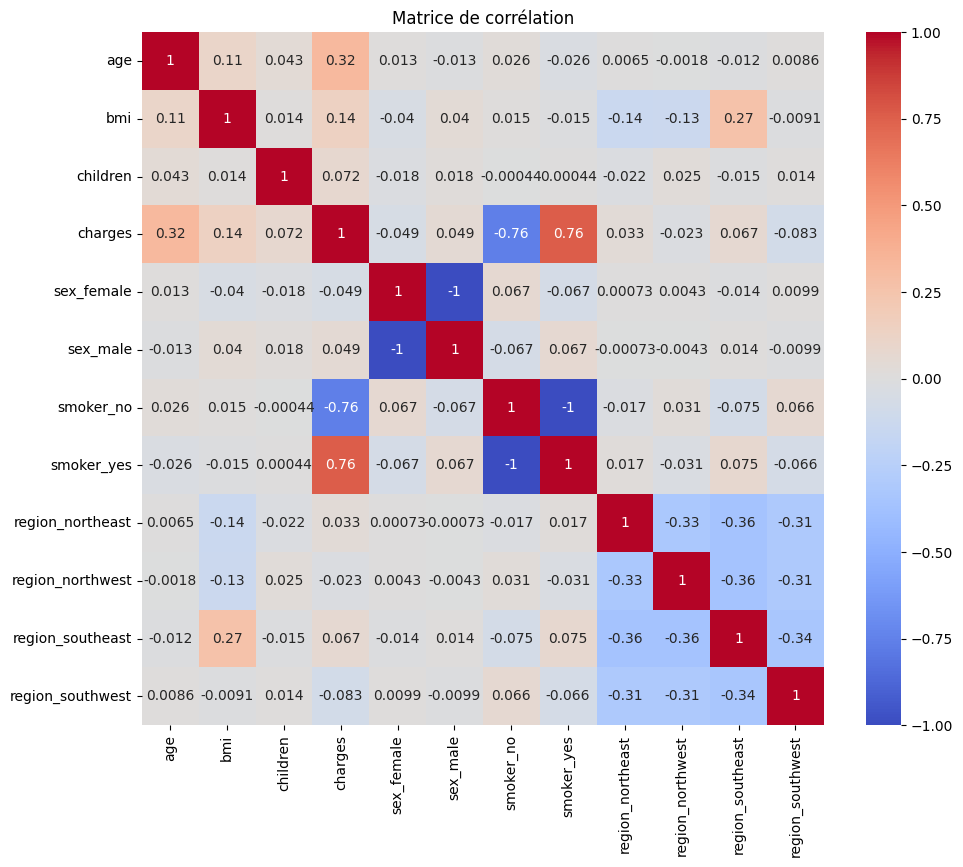

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df_prep.corr()

plt.figure(figsize=(11, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()

In [27]:
from IPython.display import display, HTML

display(HTML('''
<h2 style="color:red;">4. Modeling : </h2>
<h3 style="color:White;">1. Regression : </h3>
'''))

In [28]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
# Séparer features et target
X = df_prep.drop(columns=['charges'])
y = df_prep['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prédictions
y_pred = rf_model.predict(X_test)

# Évaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE) :", mse)
print("R² score :", r2)

Mean Squared Error (MSE) : 10863158.983001808
R² score : 0.8841504175181669


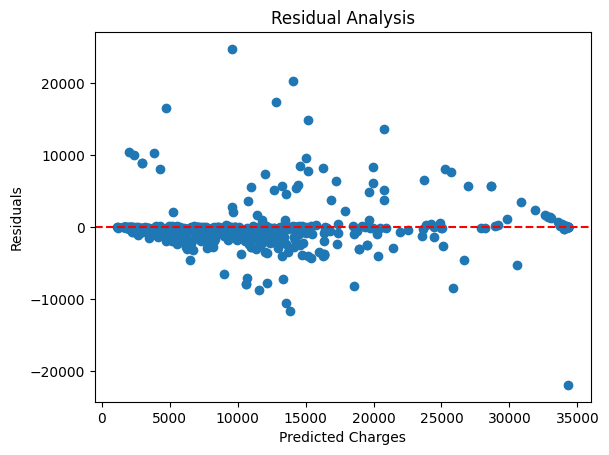

In [29]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")
plt.title("Residual Analysis")
plt.show()

In [30]:
print(df_prep['charges'].isna().sum())


0


In [31]:
import joblib

joblib.dump(rf_model, "random_forest_model.pkl")
print("Modèle sauvegardé sous : random_forest_model.pkl")


Modèle sauvegardé sous : random_forest_model.pkl


In [32]:
rf_loaded = joblib.load("random_forest_model.pkl")
new_data = pd.DataFrame([{
    'age': 22,
    'bmi': 30,
    'children': 3,
    'sex_female': 1,
    'sex_male': 0,
    'smoker_no': 0,
    'smoker_yes': 1,
    'region_northeast': 1,
    'region_northwest': 0,
    'region_southeast': 0,
    'region_southwest': 0
}])
prediction = rf_loaded.predict(new_data)
print("Charges prédites :", prediction[0])


Charges prédites : 26763.017663895564


In [33]:
from IPython.display import display, HTML

display(HTML('''
<h3 style="color:White;">2. Clustering : </h3>
'''))

In [34]:

from IPython.display import display, HTML
import pandas as pd
import numpy as np

# --- Start with raw dataset
df_cluster = df.copy()  # or pd.read_csv("path_to_your_data.csv")

# 1.1 Remove target column if exists (e.g., 'charges')
if 'charges' in df_cluster.columns:
    df_cluster = df_cluster.drop(columns=['charges'])

# 1.2 Identify categorical and numerical columns
categorical_cols = ['sex', 'smoker', 'region']
numerical_cols = df_cluster.select_dtypes(include=['int64','float64']).columns

print("Colonnes numériques:", list(numerical_cols))
print("Colonnes catégorielles:", categorical_cols)

# --- Handle missing values
for col in numerical_cols:
    df_cluster[col] = df_cluster[col].fillna(df_cluster[col].mean())

for col in categorical_cols:
    df_cluster[col] = df_cluster[col].fillna(df_cluster[col].mode().iloc[0])

# --- Outlier capping (IQR method)
for col in numerical_cols:
    Q1 = df_cluster[col].quantile(0.25)
    Q3 = df_cluster[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    df_cluster[col] = df_cluster[col].clip(lower, upper)

# --- Remove duplicates
df_cluster = df_cluster.drop_duplicates()

# --- Encode categorical variables (One-Hot Encoding)
df_cluster = pd.get_dummies(df_cluster, columns=categorical_cols, drop_first=False)

print("\nDataset final après préparation:")
display(df_cluster.head())
print("Shape:", df_cluster.shape)


Colonnes numériques: ['age', 'bmi', 'children']
Colonnes catégorielles: ['sex', 'smoker', 'region']



Dataset final après préparation:


,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,True,False,False,True,False,False,False,True
1,18.0,33.770,1.0,False,True,True,False,False,False,True,False
2,28.0,33.000,3.0,False,True,True,False,False,False,True,False
3,33.0,22.705,0.0,False,True,True,False,False,True,False,False
4,32.0,28.880,0.0,False,True,True,False,False,True,False,False


Shape: (2312, 11)


In [35]:

from sklearn.preprocessing import StandardScaler

display(HTML('''
<h2 style="color:#4dabf7; font-weight:bold;">Scaling the Data</h2>
<p>Standardisation des données pour que toutes les variables aient le même poids dans le clustering.</p>
'''))

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster)

scaled_df = pd.DataFrame(scaled_data, columns=df_cluster.columns)

print("Scaled data preview:")
display(scaled_df.head())


Scaled data preview:


,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.447056,-0.445244,-0.912679,1.025409,-1.025409,-1.974413,1.974413,-0.608003,-0.612008,-0.662349,2.355754
1,-1.518797,0.528336,-0.074149,-0.975220,0.975220,0.506480,-0.506480,-0.608003,-0.612008,1.509779,-0.424493
2,-0.801390,0.400626,1.602911,-0.975220,0.975220,0.506480,-0.506480,-0.608003,-0.612008,1.509779,-0.424493
3,-0.442687,-1.306871,-0.912679,-0.975220,0.975220,0.506480,-0.506480,-0.608003,1.633965,-0.662349,-0.424493
4,-0.514428,-0.282704,-0.912679,-0.975220,0.975220,0.506480,-0.506480,-0.608003,1.633965,-0.662349,-0.424493


In [36]:
# ===============================
# Cost-tier segmentation by CHARGES (supervised)
# ===============================
from IPython.display import display, HTML
import numpy as np, pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import joblib

display(HTML('<h2 style="color:#2a9d8f;font-weight:bold;">Supervised cost-tier segmentation by charges</h2>'))

# --- 1) Build tiers (drop rows with missing charges)
df_sup = df.copy()
df_sup = df_sup[df_sup['charges'].notna()].copy()          # <- fix NaN issue
df_sup['charges_log'] = np.log1p(df_sup['charges'])

q1, q2 = df_sup['charges_log'].quantile([0.33, 0.66])
bins   = [-np.inf, q1, q2, np.inf]
labels = [0, 1, 2]  # 0=low, 1=mid, 2=high
df_sup['cost_tier'] = pd.cut(
    df_sup['charges_log'], bins=bins, labels=labels, include_lowest=True
).astype(int)

print(f"Tier cutoffs (log1p): low≤{q1:.3f}, mid≤{q2:.3f}, high>.")
=
# --- 2) Features and split
cat_cols = ['sex','smoker','region']
num_cols = ['age','bmi','children']
X = df_sup[cat_cols + num_cols]
y = df_sup['cost_tier']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 3) Preprocess + model
pre = ColumnTransformer(
    transformers=[
        ('num', Pipeline([('imp', SimpleImputer(strategy='median')),
                          ('sc', RobustScaler())]), num_cols),
        ('cat', Pipeline([('imp', SimpleImputer(strategy='most_frequent')),
                          ('oh', OneHotEncoder(handle_unknown='ignore'))]), cat_cols)
    ]
)

clf = RandomForestClassifier(
    n_estimators=500, max_depth=None, min_samples_leaf=2,
    class_weight='balanced', random_state=42, n_jobs=-1
)

pipe = Pipeline([('pre', pre), ('clf', clf)])

# --- 4) Train
pipe.fit(X_train, y_train)

# --- 5) Evaluate
y_pred = pipe.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1m = f1_score(y_test, y_pred, average='macro')
print(f"Accuracy: {acc:.3f} | Macro-F1: {f1m:.3f}\n")
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=3))

# --- 6) Map tiers to programs
program_map = {0: 'Preventive Care & Rewards', 1: 'Standard Plan', 2: 'Premium Support'}
df_sup_test = X_test.copy()
df_sup_test['true_tier'] = y_test.values
df_sup_test['pred_tier'] = y_pred
df_sup_test['pred_program'] = df_sup_test['pred_tier'].map(program_map)
display(df_sup_test.head())

# --- 7) Save deployable pipeline
joblib.dump({'pipeline': pipe, 'program_map': program_map, 'tier_bins': (q1, q2)}, 'charges_tier_classifier.pkl')
print("Saved → charges_tier_classifier.pkl")


SyntaxError: invalid syntax (1665843857.py, line 30)

In [ ]:
display(HTML('''
<h2 style="color:#6a994e; font-weight:bold;">test the models</h2>
<p>Sauvegarde du modèle KMeans et du scaler pour les futures prédictions.</p>
'''))

In [ ]:
# b) PREDICT NEW CLIENTS (tier + mapped program)
import joblib, pandas as pd

art = joblib.load("charges_tier_classifier.pkl")
pipe = art["pipeline"]; program_map = art["program_map"]

new_clients = pd.DataFrame([
    {"sex":"male","smoker":"no","region":"northwest","age":36,"bmi":28.5,"children":1},
    {"sex":"female","smoker":"yes","region":"southeast","age":58,"bmi":32.0,"children":2},
])

pred_tier = pipe.predict(new_clients)
out = new_clients.copy()
out["pred_tier"] = pred_tier
out["program"] = out["pred_tier"].map(program_map)
display(out)


,sex,smoker,region,age,bmi,children,pred_tier,program
0,male,no,northwest,36,28.5,1,0,Preventive Care & Rewards
1,female,yes,southeast,58,32.0,2,2,Premium Support


In [ ]:
# ===============================
# Unsupervised clustering on [smoker, charges]
# ===============================
import numpy as np, pandas as pd, joblib
from IPython.display import display, HTML
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

display(HTML('<h2 style="color:#2a9d8f;font-weight:bold;">Unsupervised clustering: smoker/charges</h2>'))

# ---- 1) Data subset + cleaning
cols = ['smoker','charges']
df_sub = df[cols].dropna(subset=cols).reset_index(drop=True)

# ---- 2) Preprocessor: log1p(charges) + robust scale; one-hot for smoker
pre = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imp', SimpleImputer(strategy='median')),
            ('log', FunctionTransformer(np.log1p, feature_names_out='one-to-one')),
            ('sc', RobustScaler())
        ]), ['charges']),
        ('cat', Pipeline([
            ('imp', SimpleImputer(strategy='most_frequent')),
            ('oh', OneHotEncoder(drop='if_binary', handle_unknown='ignore'))
        ]), ['smoker'])
    ],
    remainder='drop'
)

Xz = pre.fit_transform(df_sub)
num_out = ['charges_log_scaled']
cat_out = pre.named_transformers_['cat'].named_steps['oh'].get_feature_names_out(['smoker']).tolist()
feat_names = num_out + cat_out

# ---- 3) Model search: KMeans and GMM
def try_models(X):
    results, best = [], {'name': None, 'k': None, 'model': None, 'sil': -1}
    for k in range(2, 7):
        km = KMeans(n_clusters=k, random_state=42, n_init=20)
        lab_km = km.fit_predict(X)
        sil_km = silhouette_score(X, lab_km)
        results.append(['KMeans', k, sil_km,
                        davies_bouldin_score(X, lab_km),
                        calinski_harabasz_score(X, lab_km)])
        if sil_km > best['sil']: best = {'name':'KMeans','k':k,'model':km,'sil':sil_km}

        gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
        lab_gm = gmm.fit_predict(X)
        sil_gm = silhouette_score(X, lab_gm)
        results.append(['GMM', k, sil_gm,
                        davies_bouldin_score(X, lab_gm),
                        calinski_harabasz_score(X, lab_gm)])
        if sil_gm > best['sil']: best = {'name':'GMM','k':k,'model':gmm,'sil':sil_gm}
    return pd.DataFrame(results, columns=['Model','k','Silhouette','DBI','CH']), best

table, best = try_models(Xz)
display(table.sort_values(['Silhouette','CH'], ascending=[False, False]).round(3))
print(f"Selected: {best['name']} (k={best['k']}) | Silhouette={best['sil']:.3f}")

# ---- 4) Final fit + labels
final_model = best['model'].fit(Xz)
labels = final_model.predict(Xz) if isinstance(final_model, GaussianMixture) else final_model.labels_
df_sub['Cluster'] = labels

# ---- 5) Cluster summary
tmp = pd.DataFrame(Xz, columns=feat_names, index=df_sub.index)
smk_cols = [c for c in feat_names if c.startswith('smoker_')]
smoker_yes_ind = tmp[smk_cols[0]] if smk_cols else pd.Series(0, index=df_sub.index)

summary = (pd.concat([df_sub[['charges','Cluster']],
                      smoker_yes_ind.rename('smoker_yes_ind')], axis=1)
           .groupby('Cluster')
           .agg(size=('charges','size'),
                charges_med=('charges','median'),
                charges_mean=('charges','mean'),
                smoker_rate=('smoker_yes_ind','mean'))
           .sort_index())

# ---- 6) Map clusters to programs by median charges
order = summary['charges_med'].rank(method='dense').astype(int)  # 1..K low→high
prog_map = {r:'Preventive Care & Rewards' for r in order[order<=order.max()//3 + (order.max()%3>0)].index}
mid_ids = order[(order>order.max()//3 + (order.max()%3>0)) & (order<=2*order.max()//3)].index
for r in mid_ids: prog_map[r] = 'Standard Plan'
for r in order[order>2*order.max()//3].index: prog_map[r] = 'Premium Support'

summary['program'] = [prog_map[i] for i in summary.index]
display(summary.round(3))
df_sub['Program'] = df_sub['Cluster'].map(prog_map)

# ---- 7) Save pipeline
joblib.dump({
    'preprocessor': pre,
    'model_type': best['name'],
    'model': final_model,
    'features': cols,
    'feature_names_after_transform': feat_names,
    'program_map': prog_map
}, 'segmentation_smoker_charges.pkl')
print("Saved → segmentation_smoker_charges.pkl")


,Model,k,Silhouette,DBI,CH
2,KMeans,3,0.616,0.498,7542.472
3,GMM,3,0.613,0.489,7375.723
8,KMeans,6,0.609,0.442,12488.977
1,GMM,2,0.609,0.493,3547.522
9,GMM,6,0.609,0.436,12263.779
6,KMeans,5,0.597,0.467,9747.907
7,GMM,5,0.597,0.457,9639.270
0,KMeans,2,0.589,0.628,4028.254
5,GMM,4,0.583,0.501,8883.432
4,KMeans,4,0.581,0.515,8989.329


Selected: KMeans (k=3) | Silhouette=0.616


,size,charges_med,charges_mean,smoker_rate,program
Cluster,,,,,
0,832,3180.51,3260.149,0.0,Preventive Care & Rewards
1,1343,10435.07,11658.470,0.0,Standard Plan
2,552,34278.61,31846.155,1.0,Premium Support


Saved → segmentation_smoker_charges.pkl


In [ ]:
# ===============================
# Test segmentation_smoker_charges.pkl
# ===============================
import joblib, numpy as np, pandas as pd
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

art = joblib.load("segmentation_smoker_charges.pkl")
pre   = art["preprocessor"]
model = art["model"]
features = art["features"]          # ['smoker','charges']
prog_map  = art["program_map"]

# 1) Evaluate on your data
df_eval = df[features].dropna(subset=features).copy()
Xz = pre.transform(df_eval)
labels = model.predict(Xz)

if len(np.unique(labels)) > 1:
    sil = silhouette_score(Xz, labels)
    dbi = davies_bouldin_score(Xz, labels)
    ch  = calinski_harabasz_score(Xz, labels)
    print(f"Silhouette: {sil:.3f} | DBI: {dbi:.3f} | CH: {ch:.1f}")
else:
    print("Only one cluster predicted. Skipping Silhouette/DBI/CH.")

df_eval["Cluster"] = labels
df_eval["Program"] = df_eval["Cluster"].map(prog_map)

summary = (df_eval
           .assign(smoker_yes=df_eval["smoker"].astype(str).str.lower().eq("yes"))
           .groupby("Cluster")
           .agg(size=("charges","size"),
                charges_med=("charges","median"),
                charges_mean=("charges","mean"),
                smoker_rate=("smoker_yes","mean"))
           .sort_index())
print("\nCluster sizes:\n", summary["size"])
print("\nCluster summary:\n", summary.round(3))

# 2) Predict new clients
new_clients = pd.DataFrame([
    {"smoker":"no",  "charges": 2500},
    {"smoker":"yes", "charges": 42000},
])
Xz_new = pre.transform(new_clients)
lab_new = model.predict(Xz_new)
out = new_clients.copy()
out["Cluster"] = lab_new
out["Program"] = out["Cluster"].map(prog_map)
print("\nNew clients prediction:\n", out)


Silhouette: 0.616 | DBI: 0.498 | CH: 7542.5

Cluster sizes:
 Cluster
0     832
1    1343
2     552
Name: size, dtype: int64

Cluster summary:
          size  charges_med  charges_mean  smoker_rate
Cluster                                              
0         832      3180.51      3260.149          0.0
1        1343     10435.07     11658.470          0.0
2         552     34278.61     31846.155          1.0

New clients prediction:
   smoker  charges  Cluster                    Program
0     no     2500        0  Preventive Care & Rewards
1    yes    42000        2            Premium Support


In [ ]:
from IPython.display import display, HTML

display(HTML('''
<h3 style="color:White;">3. Tweedie GLM : </h3>
'''))

In [ ]:
# A1) Vérif + sous-ensemble
req = ['bmi','sex','smoker','charges']
missing = [c for c in req if c not in df.columns]
assert not missing, f"Colonnes manquantes: {missing}"
dfA = df[req].dropna().reset_index(drop=True)

# A2) Split
from sklearn.model_selection import train_test_split
X = dfA.drop(columns='charges'); y = dfA['charges']
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# A3) Préprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.impute import SimpleImputer

num = ['bmi']
cat = ['sex','smoker']

pre = ColumnTransformer([
    ('num', Pipeline([
        ('imp', SimpleImputer(strategy='median')),
        ('sc', RobustScaler())
    ]), num),
    ('cat', Pipeline([
        ('imp', SimpleImputer(strategy='most_frequent')),
        ('oh', OneHotEncoder(drop='if_binary', handle_unknown='ignore'))
    ]), cat)
])


In [ ]:
# A4) Modèle Tweedie (prime pure)
from sklearn.linear_model import TweedieRegressor
model = Pipeline([
    ('pre', pre),
    ('reg', TweedieRegressor(power=1.5, alpha=0.1, link='log'))
])


In [ ]:
# A5) Entraînement + évaluation
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

model.fit(X_tr, y_tr)
pred = model.predict(X_te)
mae = mean_absolute_error(y_te, pred)
rmse = np.sqrt(mean_squared_error(y_te, pred))
print(f"MAE={mae:.2f}  RMSE={rmse:.2f}")


MAE=5067.66  RMSE=6509.41


In [ ]:
# A6) Sauvegarde
import joblib
joblib.dump(model, "tweedie_cost_model.pkl")
print("Sauvegardé → tweedie_cost_model.pkl")


Sauvegardé → tweedie_cost_model.pkl


In [ ]:
# A7) Prédictions nouveaux profils
import pandas as pd
new_clients = pd.DataFrame([
    {'bmi': 22.0, 'sex': 'female', 'smoker': 'no'},
    {'bmi': 32.5, 'sex': 'male',   'smoker': 'yes'}
])
new_clients['predicted_charges'] = model.predict(new_clients)
print(new_clients)


    bmi     sex smoker  predicted_charges
0  22.0  female     no        7031.197025
1  32.5    male    yes       31169.452974


Nombre d'anomalies détectées : 139


,age,sex,bmi,children,smoker,region,charges,anomaly_score
32,19.0,female,28.600,5.0,no,southwest,4687.79700,-1
34,28.0,male,36.400,1.0,yes,southwest,51194.55914,-1
39,60.0,male,39.900,0.0,yes,southwest,48173.36100,-1
55,58.0,male,36.955,2.0,yes,northwest,47496.49445,-1
83,48.0,female,41.230,4.0,no,northwest,11033.66170,-1


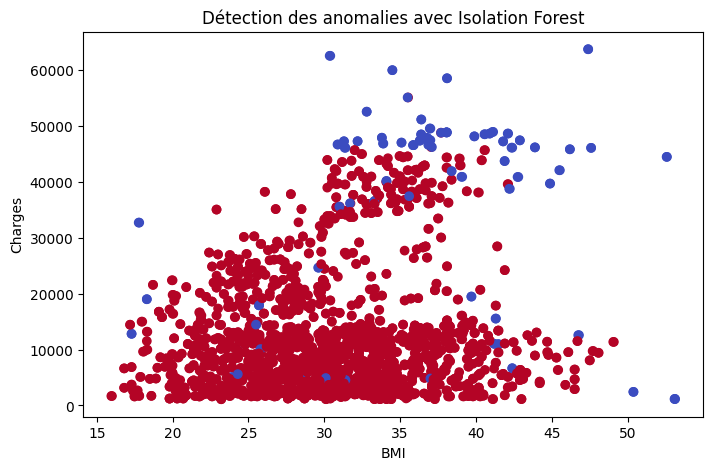

In [ ]:
from sklearn.ensemble import IsolationForest

# 1) Sélection des colonnes pertinentes
features = ['age', 'bmi', 'children', 'charges']
X = data[features]

# 2) Application du modèle Isolation Forest
iso = IsolationForest(contamination=0.05, random_state=42)
data['anomaly_score'] = iso.fit_predict(X)

# -1 = anomalie, 1 = normal
anomalies = data[data['anomaly_score'] == -1]

# 3) Résultats
print("Nombre d'anomalies détectées :", anomalies.shape[0])
display(anomalies.head())

# Visualisation
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(data['bmi'], data['charges'], c=data['anomaly_score'], cmap='coolwarm')
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("Détection des anomalies avec Isolation Forest")
plt.show()


In [ ]:
# ==========================================
# Détection de fraude avec Isolation Forest
# ==========================================

from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import pandas as pd
import joblib

# ---------------- Params ------------------
CONTAM = 0.10          # proportion cible d'anomalies (plus grand => plus strict)
TAU_Q  = CONTAM        # quantile du decision_function pour fixer le seuil
RSEED  = 42

# 1) Features
features = ['age', 'bmi', 'children', 'charges']
X = data[features]

# 2) Label "vérité" par IF initial
iso0 = IsolationForest(contamination=0.05, random_state=RSEED)
pred0 = iso0.fit_predict(X)  # retourne ndarray

# Correction de l'erreur : convertir ndarray en Series
data['true_label'] = pd.Series(pred0, index=data.index).map({1: 0, -1: 1}).astype(int)
# Alternative directe : data['true_label'] = (pred0 == -1).astype(int)

# 3) Split
X_train, X_test, y_train, y_test = train_test_split(
    X, data['true_label'],
    test_size=0.2,
    random_state=RSEED,
    stratify=data['true_label'] if len(data['true_label'].unique()) > 1 else None
)

# 4) Entraînement IF (plus strict)
model = IsolationForest(
    n_estimators=400,
    contamination=CONTAM,
    max_samples='auto',
    n_jobs=-1,
    random_state=RSEED
)
model.fit(X_train)

# ---- Seuil par quantile sur decision_function
dec_train = model.decision_function(X_train)   # >0 plus normal, <0 plus anomalie
tau = np.quantile(dec_train, TAU_Q)            # seuil appris depuis train

# 5) Prédiction sur test avec seuil personnalisé
dec_test = model.decision_function(X_test)
y_pred = (dec_test < tau).astype(int)          # < seuil => fraude(1), sinon normal(0)

# 6) Évaluation
acc = accuracy_score(y_test, y_pred)
print(f"Précision du modèle sur le test set : {acc*100:.2f}%")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nRapport de classification:")
print(classification_report(y_test, y_pred, target_names=["Normal", "Fraude"]))

print(f"\nSeuil choisi (tau, quantile {TAU_Q:.2f}) : {tau:.6f}")
print(f"Offset_ interne du modèle (référence sklearn) : {model.offset_:.6f}")

# 7) Sauvegarde (modèle + seuil)
joblib.dump({"model": model, "features": features, "tau": tau}, "isolation_forest_fraud_model.pkl")
print("\nModèle enregistré sous : isolation_forest_fraud_model.pkl")


Précision du modèle sur le test set : 95.33%

Confusion Matrix:
[[503  26]
 [  0  28]]

Rapport de classification:
              precision    recall  f1-score   support

      Normal       1.00      0.95      0.97       529
      Fraude       0.52      1.00      0.68        28

    accuracy                           0.95       557
   macro avg       0.76      0.98      0.83       557
weighted avg       0.98      0.95      0.96       557


Seuil choisi (tau, quantile 0.10) : 0.000000
Offset_ interne du modèle (référence sklearn) : -0.549341

Modèle enregistré sous : isolation_forest_fraud_model.pkl


In [ ]:
# ================================
# Test: load model and evaluate
# ================================
import joblib, numpy as np, pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1) Load saved artefacts
bundle = joblib.load("isolation_forest_fraud_model.pkl")
model   = bundle["model"]
features= bundle["features"]
tau     = bundle["tau"]

print("Loaded. Features:", features, "| tau:", tau)

# 2) Ensure X_test, y_test exist; if not, rebuild from current 'data'
if "X_test" not in globals() or "y_test" not in globals():
    from sklearn.model_selection import train_test_split
    X = data[features]
    y = data["true_label"].astype(int)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42,
        stratify=y if y.nunique()>1 else None
    )

# 3) Predict on test using same decision threshold
dec_test = model.decision_function(X_test)      # >0 more normal
y_pred   = (dec_test < tau).astype(int)         # < tau => Fraud(1)

acc = accuracy_score(y_test, y_pred)
print(f"\nTest accuracy: {acc*100:.2f}%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Normal","Fraude"]))

# 4) Inspect thresholding on a few samples
inspect = pd.DataFrame({
    "dec_fun": dec_test[:10],
    "pred": y_pred[:10],
    "true": y_test.iloc[:10].values
})
print("\nSample decisions (first 10):\n", inspect.assign(threshold=tau))

# 5) Predict on new data
nouvelle_data = pd.DataFrame({
    "age": [45, 30],
    "bmi": [27.5, 31.2],
    "children": [5, 0],
    "charges": [150, 4500]
})[features]

dec_new = model.decision_function(nouvelle_data)
pred_new = (dec_new < tau).astype(int)          # 1=Fraude, 0=Normal

out = nouvelle_data.copy()
out["dec_fun"] = dec_new
out["Fraude"]  = pred_new
print("\nPredictions on new data:\n", out)


Loaded. Features: ['age', 'bmi', 'children', 'charges'] | tau: 4.466489434166651e-17

Test accuracy: 95.33%

Confusion Matrix:
 [[503  26]
 [  0  28]]

Classification Report:
               precision    recall  f1-score   support

      Normal       1.00      0.95      0.97       529
      Fraude       0.52      1.00      0.68        28

    accuracy                           0.95       557
   macro avg       0.76      0.98      0.83       557
weighted avg       0.98      0.95      0.96       557


Sample decisions (first 10):
     dec_fun  pred  true     threshold
0  0.089859     0     0  4.466489e-17
1  0.040903     0     0  4.466489e-17
2  0.026392     0     0  4.466489e-17
3  0.021849     0     0  4.466489e-17
4  0.061634     0     0  4.466489e-17
5  0.077192     0     0  4.466489e-17
6 -0.007647     1     0  4.466489e-17
7  0.095340     0     0  4.466489e-17
8  0.086409     0     0  4.466489e-17
9  0.077227     0     0  4.466489e-17

Predictions on new data:
    age   bmi  childre

In [ ]:
# ===============================
# Clustering on [smoke, bmi]
# ===============================
import numpy as np
import pandas as pd
import joblib
from IPython.display import display, HTML
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

display(HTML('<h2 style="color:#2a9d8f;font-weight:bold;">Unsupervised clustering: smoke/bmi</h2>'))

# ---- 1) Ensure 'smoke' column exists and is clean
if 'smoke' not in df.columns:
    if 'smoker' in df.columns:
        df['smoke'] = df['smoker']
    else:
        raise KeyError("Column 'smoke' or 'smoker' not found in dataset.")

# Normalize yes/no values
_map = {
    'yes':'yes','y':'yes','true':'yes','1':'yes','smoker':'yes',
    'no':'no','n':'no','false':'no','0':'no','non':'no'
}
df['smoke'] = (df['smoke'].astype(str).str.strip().str.lower()
               .map(_map).fillna('no'))

# ---- 2) Data subset + cleaning
cols = ['smoke', 'bmi']
df_sub = df[cols].dropna(subset=cols).reset_index(drop=True)

# ---- 3) Preprocessor: robust scale BMI + one-hot encode 'smoke'
pre = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imp', SimpleImputer(strategy='median')),
            ('sc', RobustScaler())
        ]), ['bmi']),
        ('cat', Pipeline([
            ('imp', SimpleImputer(strategy='most_frequent')),
            ('oh', OneHotEncoder(drop='if_binary', handle_unknown='ignore'))
        ]), ['smoke'])
    ],
    remainder='drop'
)

Xz = pre.fit_transform(df_sub)

# feature names
num_out = ['bmi_scaled']
cat_out = pre.named_transformers_['cat'].named_steps['oh'] \
            .get_feature_names_out(['smoke']).tolist()
feat_names = num_out + cat_out

# ---- 4) Model search: KMeans and GMM
def try_models(X):
    results, best = [], {'name': None, 'k': None, 'model': None, 'sil': -1}
    for k in range(2, 7):
        # KMeans
        km = KMeans(n_clusters=k, random_state=42, n_init=20)
        lab_km = km.fit_predict(X)
        sil_km = silhouette_score(X, lab_km)
        results.append(['KMeans', k, sil_km,
                        davies_bouldin_score(X, lab_km),
                        calinski_harabasz_score(X, lab_km)])
        if sil_km > best['sil']: best = {'name': 'KMeans', 'k': k, 'model': km, 'sil': sil_km}

        # Gaussian Mixture
        gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
        lab_gm = gmm.fit_predict(X)
        sil_gm = silhouette_score(X, lab_gm)
        results.append(['GMM', k, sil_gm,
                        davies_bouldin_score(X, lab_gm),
                        calinski_harabasz_score(X, lab_gm)])
        if sil_gm > best['sil']: best = {'name': 'GMM', 'k': k, 'model': gmm, 'sil': sil_gm}
    return pd.DataFrame(results, columns=['Model', 'k', 'Silhouette', 'DBI', 'CH']), best

table, best = try_models(Xz)
display(table.sort_values(['Silhouette','CH'], ascending=[False, False]).round(3))
print(f"Selected: {best['name']} (k={best['k']}) | Silhouette={best['sil']:.3f}")

# ---- 5) Final fit + labels
final_model = best['model'].fit(Xz)
labels = final_model.predict(Xz) if isinstance(final_model, GaussianMixture) else final_model.labels_
df_sub['Cluster'] = labels

# ---- 6) Cluster summary
tmp = pd.DataFrame(Xz, columns=feat_names, index=df_sub.index)
smk_cols = [c for c in feat_names if c.startswith('smoke_')]
smoke_yes_ind = tmp[smk_cols[0]] if smk_cols else pd.Series(0, index=df_sub.index)

summary = (pd.concat([df_sub[['bmi', 'Cluster']],
                      smoke_yes_ind.rename('smoke_yes_ind')], axis=1)
           .groupby('Cluster')
           .agg(size=('bmi','size'),
                bmi_med=('bmi','median'),
                bmi_mean=('bmi','mean'),
                smoke_rate=('smoke_yes_ind','mean'))
           .sort_index())

# ---- 7) Map clusters to programs by median BMI
order = summary['bmi_med'].rank(method='dense').astype(int)
prog_map = {r:'Healthy Weight Program' for r in order[order <= order.max()//3 + (order.max()%3>0)].index}
mid_ids = order[(order > order.max()//3 + (order.max()%3>0)) & (order <= 2*order.max()//3)].index
for r in mid_ids: prog_map[r] = 'Balanced Wellness Plan'
for r in order[order > 2*order.max()//3].index: prog_map[r] = 'Advanced Weight Support'

summary['program'] = [prog_map[i] for i in summary.index]
display(summary.round(3))
df_sub['Program'] = df_sub['Cluster'].map(prog_map)

# ---- 8) Save pipeline
joblib.dump({
    'preprocessor': pre,
    'model_type': best['name'],
    'model': final_model,
    'features': cols,
    'feature_names_after_transform': feat_names,
    'program_map': prog_map
}, 'segmentation_smoke_bmi.pkl')

print("Saved → segmentation_smoke_bmi.pkl")


,Model,k,Silhouette,DBI,CH
6,KMeans,5,0.534,0.579,3521.264
8,KMeans,6,0.522,0.563,4010.731
7,GMM,5,0.498,0.577,2936.774
2,KMeans,3,0.494,0.742,2481.349
4,KMeans,4,0.494,0.646,2967.686
9,GMM,6,0.490,0.573,2905.333
0,KMeans,2,0.446,0.885,2697.004
5,GMM,4,0.432,0.731,1578.112
1,GMM,2,0.422,1.179,849.823
3,GMM,3,0.358,0.842,683.108


Selected: KMeans (k=5) | Silhouette=0.534


,size,bmi_med,bmi_mean,smoke_rate,program
Cluster,,,,,
0,1039,30.875,30.949,0.000,Balanced Wellness Plan
1,654,24.212,23.752,0.000,Healthy Weight Program
2,506,38.098,38.989,0.004,Advanced Weight Support
3,297,26.410,25.926,1.000,Healthy Weight Program
4,252,35.600,36.156,1.000,Advanced Weight Support


Saved → segmentation_smoke_bmi.pkl
